In [36]:
import h5py
from matplotlib import pyplot as plt
import numpy as np
import os
import sys

sys.path.append('../src')
import localmodule

dataset_name = localmodule.get_dataset_name()
data_dir = localmodule.get_data_dir()
hdf5_dir = os.path.join(data_dir, dataset_name + "_hdf5")
original_dir = os.path.join(hdf5_dir, "original")
units = localmodule.get_units()

unit_sizes = []
for unit in units:
    unit_name =\
        "_".join([dataset_name,"original", unit]) + ".hdf5"
    unit_path = os.path.join(original_dir, unit_name)
    unit_file = h5py.File(unit_path)
    unit_sizes.append(len(unit_file["waveforms"]))



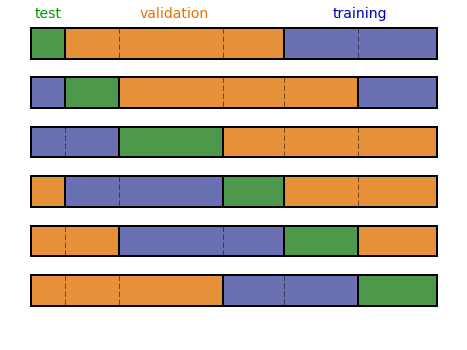

In [198]:
import matplotlib
%matplotlib inline

xs = np.cumsum([0] + unit_sizes)
fig = plt.figure(figsize=(8, 6))
y = 0

training_color = ["#E69039"]
validation_color = ["#6B70B2"]
test_color = ["#4C994C"]

colors = test_color + training_color * 3 + validation_color * 2
permuted_colors = colors
test_unit = 0
training_unit_start = 1
validation_unit_start = 4

rect_height = 0.618

for fold_id in range(6):
    y = fold_id
    
    for x, w, color in zip(xs[:-1], np.diff(xs), permuted_colors):
        rectangle = matplotlib.patches.Rectangle(
            (x,y), w, rect_height,
            facecolor=color, alpha=1.0)
        fig.gca().add_patch(rectangle)
        plt.plot([x, x], [y, y+rect_height], "--", color="k", linewidth=0.5)
    
    rectangle = matplotlib.patches.Rectangle(
        (xs[test_unit],y), np.diff(xs)[test_unit], rect_height,
        fill=False, alpha=1.0,
        linestyle='-', edgecolor='k', linewidth=2.0)
    fig.gca().add_patch(rectangle)
    
    training_unit_stop = min(training_unit_start+3, 6)
    training_width = xs[training_unit_stop] - xs[training_unit_start]
    
    rectangle = matplotlib.patches.Rectangle(
        (xs[training_unit_start],y), training_width, rect_height,
        fill=False, alpha=1.0,
        linestyle='-', edgecolor='k', linewidth=2.0)
    fig.gca().add_patch(rectangle)
    
    if validation_unit_start < 6:
        validation_unit_stop = min(validation_unit_start+2, 6)
        validation_width =\
            xs[validation_unit_stop] - xs[validation_unit_start]

        rectangle = matplotlib.patches.Rectangle(
            (xs[validation_unit_start],y), validation_width, rect_height,
            fill=False, alpha=1.0,
            linestyle='-', edgecolor='k', linewidth=2.0)
        fig.gca().add_patch(rectangle)
    
    if test_unit > 0:
        validation_unit_stop = np.mod(validation_unit_start+2, 6)

        if xs[np.mod(validation_unit_start, 6)] > xs[validation_unit_stop]:
            x = 0
        else:
            x = xs[np.mod(validation_unit_start, 6)]
            
        validation_width = xs[validation_unit_stop] - x
        rectangle = matplotlib.patches.Rectangle(
            (x,y), validation_width, rect_height,
            fill=False, alpha=1.0,
            linestyle='-', edgecolor='k', linewidth=2.0)
        fig.gca().add_patch(rectangle)
        
        
    if test_unit > 2:
        training_unit_stop = np.mod(training_unit_start+3, 6)

        if xs[np.mod(training_unit_start, 6)] > xs[training_unit_stop]:
            x = 0
        else:
            x = xs[np.mod(training_unit_start, 6)]
            
        training_width = xs[training_unit_stop] - x
        rectangle = matplotlib.patches.Rectangle(
            (x,y), training_width, rect_height,
            fill=False, alpha=1.0,
            linestyle='-', edgecolor='k', linewidth=2.0)
        fig.gca().add_patch(rectangle)
    
    test_unit = test_unit + 1
    training_unit_start = training_unit_start + 1
    validation_unit_start = validation_unit_start + 1
        
    permuted_colors = permuted_colors[-1:] + permuted_colors[:-1]

    
mu = 0.5
text_y = -0.2
plt.text((1-mu) * xs[0]+ mu * xs[1], text_y,
         "test", fontsize=14, color="#009900",
         horizontalalignment="center")

plt.text((1-mu) * xs[1]+ mu * xs[4], text_y,
         "validation", fontsize=14, color="#E67300",
         horizontalalignment="center")

plt.text((1-mu) * xs[4]+ mu * xs[6], text_y,
         "training", fontsize=14, color="#0000B2",
         horizontalalignment="center")

plt.xlim([-xs[-1]*0.05, xs[-1]*1.05])
plt.ylim([-len(units)*0.05, len(units)*1.05])
plt.gca().invert_yaxis()

fig.gca().get_xaxis().set_visible(False)
fig.gca().get_yaxis().set_visible(False)
fig.gca().spines['left'].set_visible(False)
fig.gca().spines['right'].set_visible(False)
fig.gca().spines['bottom'].set_visible(False)
fig.gca().spines['top'].set_visible(False)

plt.savefig("fig_cross-validation.png", bbox_inches="tight")